In [2]:
!pip install matplotlib
!pip install vega_datasets
!pip install --upgrade folium

Requirement already up-to-date: folium in c:\users\katherine\appdata\local\programs\python\python37-32\lib\site-packages (0.10.1)


## 1 - Retrieving the dataset from source:

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data

data_url_counties = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
data_url_states = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
us_counties = pd.read_csv(data_url_counties, error_bad_lines=False)
display(us_counties.head())
display(us_counties.info())

us_states = pd.read_csv(data_url_states, error_bad_lines=False)
display(us_states.head())
display(us_states.info())

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43285 entries, 0 to 43284
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    43285 non-null  object 
 1   county  43285 non-null  object 
 2   state   43285 non-null  object 
 3   fips    42687 non-null  float64
 4   cases   43285 non-null  int64  
 5   deaths  43285 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ MB


None

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2049 non-null   object
 1   state   2049 non-null   object
 2   fips    2049 non-null   int64 
 3   cases   2049 non-null   int64 
 4   deaths  2049 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 64.1+ KB


None

## 2 - Get basic information of cases in each state on current day
We retrieve the latest date that the data includes, and display the distribution of cases for each state on the latest day, as well as the total number of cases on the latest day. We are only considering the 50 states, Washington DC, and Puerto Rico. 

In [4]:
from datetime import datetime, timedelta



#get the date range of the data
total_dates = us_states["date"].unique()
date_range = [total_dates[1],total_dates[len(total_dates)-1]]
print("Date range of data: " + str(date_range[0]) + " to " + str(date_range[1]))

#extract the latest data
latest_date = date_range[1]
latest_cases = us_states[us_states["date"]==latest_date]
latest_cases = latest_cases[latest_cases.state != 'Guam']
latest_cases = latest_cases[latest_cases.state != 'Northern Mariana Islands']
latest_cases = latest_cases[latest_cases.state != 'Virgin Islands']

display(latest_cases)

#get the latest total cases
total_cases = latest_cases["cases"].sum()
print("Total cases on " + str(latest_date) + ": "+  str(total_cases))

latest_cases.shape

Date range of data: 2020-01-22 to 2020-04-08


,date,state,fips,cases,deaths
1994,2020-04-08,Alabama,1,2499,67
1995,2020-04-08,Alaska,2,224,5
1996,2020-04-08,Arizona,4,2726,80
1997,2020-04-08,Arkansas,5,1077,18
1998,2020-04-08,California,6,19043,506
1999,2020-04-08,Colorado,8,5655,192
2000,2020-04-08,Connecticut,9,8781,335
2001,2020-04-08,Delaware,10,1116,19
2002,2020-04-08,District of Columbia,11,1440,27
2003,2020-04-08,Florida,12,15690,322


Total cases on 2020-04-08: 428854


(52, 5)

## 3 - Basic Descriptive Statistics
We look at the range, mean, and standard deviation in number of cases and deaths on March 14, 2020, compared to April 8, 2020. We chose March 14, 2020, because that is the first date on which all 52 locations reported at least one case. Below are the distributions of values for these dates. 

Stats for March 14, 2020

Cases:

Min: 1 (Alaska)
Max: 610 (New York)
Mean: 55.73076923076923
Std Dev: 125.37334291276663

Deaths:

Min: 0 (Alabama)
Max: 40 (Washington)
Mean: 1.1538461538461537
Std Dev: 5.570878817511352



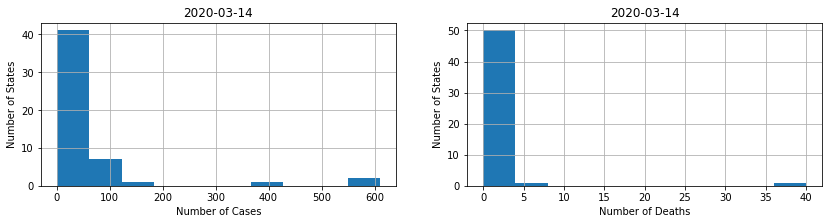

In [5]:
#data for first_date
first_date = "2020-03-14"
first_date_cases = us_states[us_states["date"]==first_date]
first_date_cases = first_date_cases[first_date_cases.state != 'Guam']
first_date_cases = first_date_cases[first_date_cases.state != 'Northern Mariana Islands']
first_date_cases = first_date_cases[first_date_cases.state != 'Virgins Islands']

#min, max, mean, and std dev for first_date cases
first_max_c = first_date_cases['cases'].max()
first_max_idx_c = first_date_cases['cases'].idxmax()
first_max_state_c = first_date_cases['state'][first_max_idx_c]

first_min_c = first_date_cases['cases'].min()
first_min_idx_c = first_date_cases['cases'].idxmin()
first_min_state_c = first_date_cases['state'][first_min_idx_c]

first_mean_c = first_date_cases['cases'].mean()
first_std_c = first_date_cases['cases'].std()

print("Stats for March 14, 2020\n")

#print stats for first_date cases
print("Cases:\n")
print("Min: " + str(first_min_c) + " (" + first_min_state_c + ")")
print("Max: " + str(first_max_c)+ " (" + first_max_state_c + ")")
print("Mean: " + str(first_mean_c))
print("Std Dev: " + str(first_std_c) + "\n")

#min, max, mean, and std dev for first_date deaths
first_max_d = first_date_cases['deaths'].max()
first_max_idx_d = first_date_cases['deaths'].idxmax()
first_max_state_d = first_date_cases['state'][first_max_idx_d]

first_min_d = first_date_cases['deaths'].min()
first_min_idx_d = first_date_cases['deaths'].idxmin()
first_min_state_d = first_date_cases['state'][first_min_idx_d]

first_mean_d = first_date_cases['deaths'].mean()
first_std_d = first_date_cases['deaths'].std()

#print stats for first_date deaths
print("Deaths:\n")
print("Min: " + str(first_min_d) + " (" + first_min_state_d + ")")
print("Max: " + str(first_max_d)+ " (" + first_max_state_d + ")")
print("Mean: " + str(first_mean_d))
print("Std Dev: " + str(first_std_d) + "\n")

#plot stats for first_date
first_date_f = plt.figure(figsize=(14,3))

first_ax_c = first_date_f.add_subplot(121)
first_ax_d = first_date_f.add_subplot(122)

first_ax_c.set_title(first_date)
first_ax_c.set_xlabel("Number of Cases")
first_ax_c.set_ylabel("Number of States")

first_ax_d.set_title(first_date)
first_ax_d.set_xlabel("Number of Deaths")
first_ax_d.set_ylabel("Number of States")

first_date_cases["cases"].hist(bins=10, ax=first_ax_c)
first_date_cases["deaths"].hist(bins=10, ax=first_ax_d)
plt.show()

Stats for April 8, 2020

Cases:

Min: 224 (Alaska)
Max: 149401 (New York)
Mean: 8247.192307692309
Std Dev: 21567.39906509083

Deaths:

Min: 0 (Wyoming)
Max: 6268 (New York)
Mean: 285.0
Std Dev: 888.2489714568306


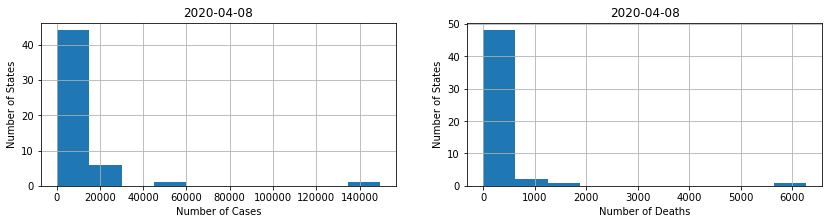

In [6]:
#data for last_date
last_date = "2020-04-08"
last_date_cases = us_states[us_states["date"]==last_date]
last_date_cases = last_date_cases[last_date_cases.state != 'Guam']
last_date_cases = last_date_cases[last_date_cases.state != 'Northern Mariana Islands']
last_date_cases = last_date_cases[last_date_cases.state != 'Virgin Islands']

#min, max, mean, and std dev for first_date cases
last_max_c = last_date_cases['cases'].max()
last_max_idx_c = last_date_cases['cases'].idxmax()
last_max_state_c = last_date_cases['state'][last_max_idx_c]

last_min_c = last_date_cases['cases'].min()
last_min_idx_c = last_date_cases['cases'].idxmin()
last_min_state_c = last_date_cases['state'][last_min_idx_c]

last_mean_c = last_date_cases['cases'].mean()
last_std_c = last_date_cases['cases'].std()

#print stats for last_date cases
print("Stats for April 8, 2020\n")
print("Cases:\n")
print("Min: " + str(last_min_c) + " (" + last_min_state_c + ")")
print("Max: " + str(last_max_c)+ " (" + last_max_state_c + ")")
print("Mean: " + str(last_mean_c))
print("Std Dev: " + str(last_std_c) + "\n")

#min, max, mean, and std dev for last_date deaths
last_max_d = last_date_cases['deaths'].max()
last_max_idx_d = last_date_cases['deaths'].idxmax()
last_max_state_d = last_date_cases['state'][last_max_idx_d]

last_min_d = last_date_cases['deaths'].min()
last_min_idx_d = last_date_cases['deaths'].idxmin()
last_min_state_d = last_date_cases['state'][last_min_idx_d]

last_mean_d = last_date_cases['deaths'].mean()
last_std_d = last_date_cases['deaths'].std()

#print stats for last_date deaths
print("Deaths:\n")
print("Min: " + str(last_min_d) + " (" + last_min_state_d + ")")
print("Max: " + str(last_max_d)+ " (" + last_max_state_d + ")")
print("Mean: " + str(last_mean_d))
print("Std Dev: " + str(last_std_d))

#plot stats for last_date 
last_date_f = plt.figure(figsize=(14,3))

last_ax_c = last_date_f.add_subplot(121)
last_ax_d = last_date_f.add_subplot(122)

last_ax_c.set_title(last_date)
last_ax_c.set_xlabel("Number of Cases")
last_ax_c.set_ylabel("Number of States")

last_ax_d.set_title(last_date)
last_ax_d.set_xlabel("Number of Deaths")
last_ax_d.set_ylabel("Number of States")

last_date_cases["cases"].hist(bins=10, ax=last_ax_c)
last_date_cases["deaths"].hist(bins=10, ax=last_ax_d)
plt.show()

## 4 - Examining the trend of when states began reporting cases in the US

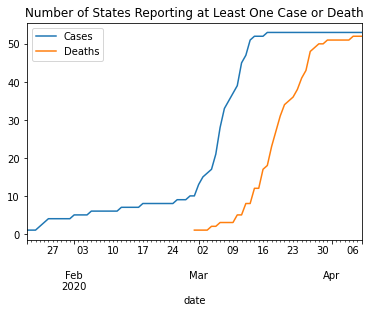

In [46]:
states_only = us_states[us_states.state != 'Guam']
states_only = states_only[states_only.state != 'Northern Mariana Islands']
states_only = states_only[states_only.state != 'Virgins Islands']

first_case_series = states_only.groupby('date').size()
first_case_series.plot(kind="line", label="Cases", legend=True, title="Number of States Reporting at Least One Case or Death")

states_only = states_only[states_only.deaths > 0]
first_death_series = states_only.groupby('date').size()
first_death_series.plot(kind="line", label="Deaths", legend="True")

## 5 - Examining case growth curves in "hot spot" states
We defined 'hot spot' states as those who make up more than 4% of the country's cases on the latest date recorded


In [8]:
us_states['date'] = pd.to_datetime(us_states['date'], format="%Y/%m/%d")

recent_cases = us_states[us_states['date']>"2020-03-1"]
hotspot_threshold=total_cases*.04

states_slow_growth = recent_cases[recent_cases['date']==latest_date]
states_slow_growth = states_slow_growth[states_slow_growth['cases']<hotspot_threshold]
states_slow_growth= states_slow_growth["state"]
recent_cases_hot_spot = recent_cases[~recent_cases.state.isin(states_slow_growth)]

scales = alt.selection_interval(bind='scales')
highlight = alt.selection(type='single', on='mouseover', fields=['state'], nearest=True)

base = alt.Chart(recent_cases_hot_spot).mark_line(point=True).encode(
    y=alt.Y('cases:Q', axis=alt.Axis(title='Total Cases')),
#     x='date:T',
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
#     y='cases:Q',
    color='state:N',
    tooltip=['state', 'cases', 'date']
)


points = base.mark_circle().encode(
    opacity=alt.value(1)
).add_selection(
    highlight
).properties(
    width=600,
    title='Total cases in hot spot states growth curve'
)


lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.25), alt.value(3))
)

display(points + lines)


alt.LayerChart(...)

## 6 - Examining percentage of cases compared to all states
The below chart maps which states have the majority of cases at a given date. We can see how Washington and California originally had majority of cases in the U.S., and how quickly New York took over, and continues to make up a large percentage of cases in the U.S.

In [9]:
chart = alt.Chart(recent_cases).mark_area().encode(
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
    y=alt.Y('cases:Q', stack="normalize", axis=alt.Axis(format='%', title='Percent of Total Cases')), 
#     x="date:T",
#     y=alt.Y("cases:Q", stack="normalize"),
    tooltip=['state', 'cases', 'date'],
    color= alt.Color('state:N', scale=alt.Scale(scheme='category20b'))

).properties(
    width=700,
    height=550,
    title="Distribution of cases among all states"
)

display(chart)

alt.Chart(...)

## 7 - Examining cases in New Jersey
We will take a look at how cases are distributed by county in New Jersey.

The map below shows an interesting distrubution of cases in the sense that the more north-east the county is, the higher the number of cases. This could be attributed to the fact that north Jersey is very densely populated, as well as its proximity to New York City.

TODO eventually:
https://towardsdatascience.com/how-to-build-a-time-series-dashboard-in-python-with-panel-altair-and-a-jupyter-notebook-c0ed40f02289

https://nextjournal.com/sdanisch/data-types-graphical-marks-and-visual-encoding-channels

In [10]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
# airports = data.airports.url


nj_county_coord = pd.read_csv("nj_county_coordinates.csv", error_bad_lines=False)
nj_county_coord=nj_county_coord.set_index('county')


jersey_cases = us_counties.loc[(us_counties['date']==latest_date) & (us_counties['state']=='New Jersey') ]
jersey_cases= jersey_cases.set_index('county')


jersey_cases['lat']= nj_county_coord['lat']
jersey_cases['long']= nj_county_coord['long']
jersey_cases=jersey_cases.drop(['Unknown'])
jersey_cases=jersey_cases.reset_index()
# display(jersey_cases)


map_jersey =(
    alt.Chart(counties).mark_geoshape(
        fill='#fffafc',
        stroke='darkgray'
    ).transform_calculate(state_id = "(datum.id / 1000)|0")
    .transform_filter((alt.datum.state_id)==34)
).properties(
    width=800,
    height=600
).project('albersUsa')


# county positions on background
points = alt.Chart(jersey_cases).mark_point(filled=True, size=200).encode(
    longitude='long:Q',
    latitude='lat:Q',
    size=alt.Size('cases:Q', title='Number of Cases'),
    color=alt.Color('cases:Q', scale=alt.Scale(scheme='yelloworangered')),
    tooltip=['cases:N','county:N']
).properties(
    title='Cases in NJ'
)
# .transform_filter((datum.symbol == ticker) # this ties in the filter 
# .add_selection(select_date).transform_filter(select_date)

map_jersey + points


alt.LayerChart(...)

## 8 - Heatmap of cases in America

In [11]:
import folium
import folium.plugins # The Folium Javascript Map Library

USA_COORDINATES = (39.8283, -98.5795)
usa_map = folium.Map(location=USA_COORDINATES,zoom_start=3)
state_geo = 'us-states.json'
bins = list(latest_cases['cases'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=latest_cases,
    columns=['state', 'cases'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    bins=bins,
    legend_name='Number of COVID-19 Cases' 
).add_to(usa_map)

folium.LayerControl().add_to(usa_map)

usa_map


### 8.1 - Excluding New York
New York has been aggressively testing and therefore has 67,180 more cases than the state with the second highest number of cases. Let's disregard New York to get a better look at how the other states compare. 

In [12]:
#Find NY row
indexNames = latest_cases[latest_cases['state'] == 'New York' ].index
 
# Delete this row from dataFrame
data_minus_NY = latest_cases.drop(indexNames)

bins_minus_NY = list(data_minus_NY['cases'].quantile([0, 0.25, 0.5, 0.75, 1]))

no_ny_map = folium.Map(location=USA_COORDINATES,zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    data=data_minus_NY,
    columns=['state', 'cases'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    #bins=bins_minus_NY,
    legend_name='Number of COVID-19 Cases' 
).add_to(no_ny_map)

folium.LayerControl().add_to(no_ny_map)

no_ny_map


## 9 - Heatmap of deaths in America
Now we'll plot deaths.

In [13]:
usa_death_map = folium.Map(location=USA_COORDINATES,zoom_start=3)
death_bins = list(latest_cases['deaths'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=latest_cases,
    columns=['state', 'deaths'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    bins=death_bins,
    legend_name='Number of COVID-19 Deaths' 
).add_to(usa_death_map)

folium.LayerControl().add_to(usa_death_map)

usa_death_map

### 9.1 Excluding New York again
Let's remove NY again, which currently has the worst outbreak of COVID-19.

In [14]:
no_ny_death_map = folium.Map(location=USA_COORDINATES,zoom_start=3)
no_ny_death_bins = list(data_minus_NY['deaths'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=data_minus_NY,
    columns=['state', 'deaths'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Number of COVID-19 Deaths' 
).add_to(no_ny_death_map)

folium.LayerControl().add_to(no_ny_death_map)

no_ny_death_map

Note the difference between putting the values into 6 evenly spaced bins versus putting them into bins based on quantiles. Because states like NY and NJ have such high relative case values (and have more deaths in general because the outbreak is so bad there), it's hard to pick bins that make both the visualization (the actual map) AND the legend valuable.